# Task Description:  

- Modify and/or use the already existing functionality of PyAutoLens to simulate strong lensing from superfluid dark matter. Specifically, you will need to simulate the effects of lensing from a linear mass density - imagine this being a string of mass on galactic scales.
- Refer to the following notebooks for examples of how to simulate strong gravitational lensing with PyAutoLens: https://github.com/Jammy2211/autolens_workspace/tree/master/howtolens/chapter_1_introduction
---

In [1]:
import autofit as af
import autolens as al
import autolens.plot as aplt
import os

In [2]:
# Setup the path to the autolens_workspace.
workspace_path = "{}/".format(os.path.dirname(os.path.abspath('')))
dataset_name = "dark-matter-simulation-output"

# Create the path where the dataset will be output if it doesn't already exist
dataset_path = af.path_util.make_and_return_path_from_path_and_folder_names(
    path=workspace_path, folder_names=["Dataset", dataset_name]
)

In [3]:
# The pixel scale of the image to be simulated
pixel_scales = 0.1

# Simulate a simple Gaussian PSF for the image.
psf = al.kernel.from_gaussian(shape_2d=(11, 11), sigma=0.1, pixel_scales=pixel_scales)

# Creating a simulator object for imaging
simulator = al.simulator.imaging(
    shape_2d=(100, 100),  # grid size
    pixel_scales=pixel_scales,
    sub_size=4,
    exposure_time=300.0,
    psf=psf,
    background_level=0.1,
    add_noise=True,
)

In [4]:
# creating a dark matter plane which will act as a lens

lens_dark_matter = al.Galaxy(
    redshift=0.5,
    light=al.lmp.EllipticalSersic(
        centre=(0.0, 0.0),
        axis_ratio=0.9,
        phi=45.0,
        intensity=1.3,
        effective_radius=0.8,
        sersic_index=4.0,
        mass_to_light_ratio=0.3,
    ),
    mass=al.mp.SphericalNFW(centre=(0.0, 0.0), kappa_s=0.1, scale_radius=20.0),
    shear=al.mp.ExternalShear(magnitude=0.03, phi=45.0),
)


# creating a source galaxy which will be lensed by dark matter

source_galaxy = al.Galaxy(
    redshift=1.0,
    light=al.lp.EllipticalSersic(
        centre=(0.0, 0.2),
        axis_ratio=0.8,
        phi=60.0,
        intensity=0.3,
        effective_radius=1.0,
        sersic_index=2.5,
    ),
)

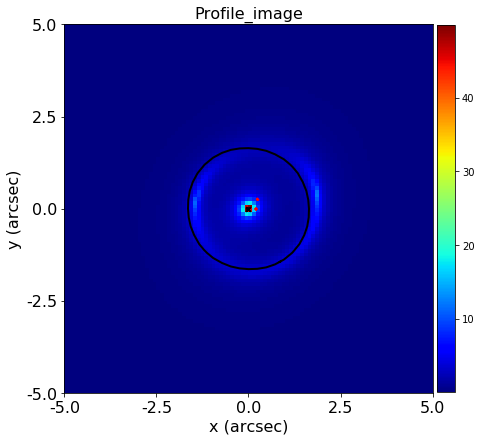

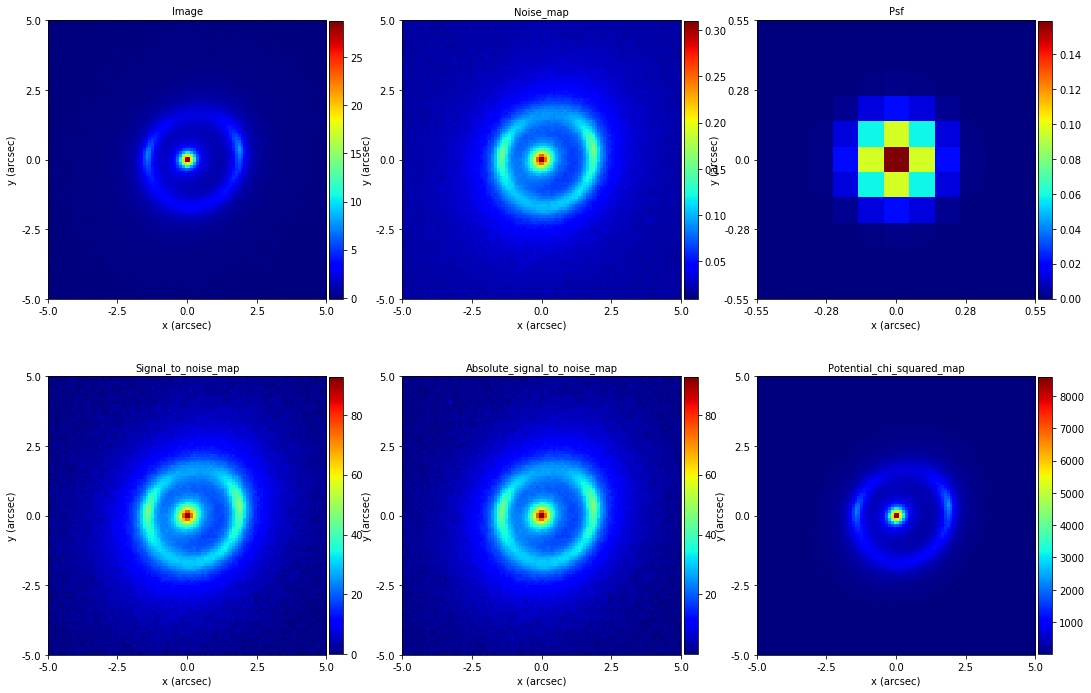

In [5]:
# Setup a tracer object for simulation
tracer = al.Tracer.from_galaxies(galaxies=[lens_dark_matter, source_galaxy])

# Passing the simulator plane grid to the tracer
aplt.tracer.profile_image(tracer=tracer, grid=simulator.grid)

# Passing back the tracer to the simulator for ray tracing and generation of simulated image dataset
imaging = simulator.from_tracer(tracer=tracer)

# Plotting a simulated image
aplt.imaging.subplot_imaging(imaging=imaging)

In [6]:
# Saving our simulated output as .fits files in the output path.

# The image will be output as 'image.fits'.
# The noise-map will be output as 'noise_map.fits'.
# The psf will be output as 'psf.fits'.

print("Output Path:", dataset_path)

imaging.output_to_fits(
    image_path=dataset_path + "image.fits",
    psf_path=dataset_path + "psf.fits",
    noise_map_path=dataset_path + "noise_map.fits",
    overwrite=True,
)

Output Path: /Users/harshitjindal/Desktop/GSOC 2020/cern/dark-matter-simulation/autolens_workspace/cern_exam/Dataset/dark-matter-simulation-output/
